In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

In [2]:
raw_data = pd.read_csv("./EmployeeAttrition.csv", index_col=0)

In [3]:
raw_data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,...,3,4,1,6,3,3,2,2,2,2


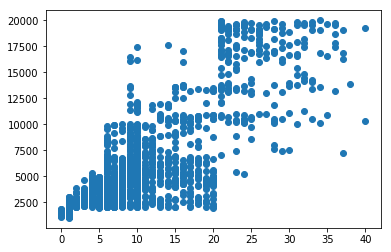

In [4]:
plt.scatter(raw_data["TotalWorkingYears"], raw_data["MonthlyIncome"])
plt.show()

In [5]:
two_mode_data = np.array(raw_data[["TotalWorkingYears", "MonthlyIncome"]])

In [6]:
kmeans_model = KMeans(n_clusters=3, random_state=100).fit(two_mode_data)

In [7]:
color_list = ["blue", "red", "yellow", "green", "black"]

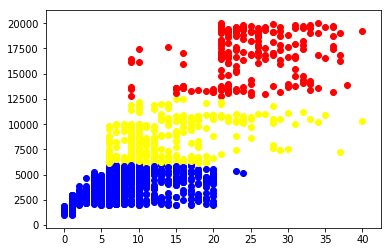

In [8]:
for value, label in zip(two_mode_data, kmeans_model.labels_):
    x = value[0]
    y = value[1]
    color = color_list[label]
    plt.scatter(x, y, color=color)
plt.show()

In [9]:
gmm_model = GaussianMixture(n_components=3, random_state=0).fit(two_mode_data)
gmm_labels = gmm_model.predict(two_mode_data)

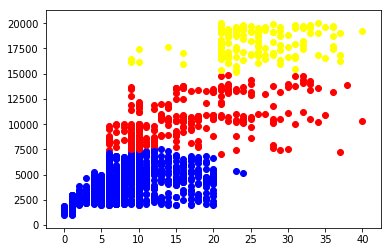

In [10]:
for value, label in zip(two_mode_data, gmm_labels):
    x = value[0]
    y = value[1]
    color = color_list[label]
    plt.scatter(x, y, color=color)
plt.show()

In [11]:
## Import Library ##
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## For Data Encoding ##
from sklearn.preprocessing import LabelEncoder

## For Model Evaluation ##
from sklearn.model_selection import KFold

## Machine Learning Model ##
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

## For Model Performance ##
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

## For Feature Selection ##
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

## For Imbalance Data
from sklearn.utils import resample

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where

from sklearn.metrics import roc_auc_score, plot_roc_curve

In [13]:
## Model Performance
def evaluation(gt, pred):
    acc = accuracy_score(gt, pred)
    precision = precision_score(gt, pred)
    recall = recall_score(gt, pred)
    f1 = f1_score(gt, pred)
    matrix = confusion_matrix(gt, pred)
    
    return acc, precision, recall, f1, matrix

In [24]:
## Model Learning (Random Forest)
from sklearn.ensemble import RandomForestClassifier

total=len(two_mode_data)
print(total)

testPortion = 0.3
testSize = int(testPortion*total)

lr_XX = two_mode_data
lr_yy = gmm_labels

train_X = lr_XX[0:-testSize]
train_y = lr_yy[0:-testSize]
test_X = lr_XX[-testSize:]
test_y = lr_yy[-testSize:]

model = RandomForestClassifier(n_estimators=300)
model = model.fit(train_X, train_y)
test_predict = model.predict(test_X)
    
   
model.score(test_X, test_y)
test_predict

1470


array([0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 2, 0, 2, 1, 2, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 1,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 1, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 2, 0, 1, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,

In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test_y, test_predict)
print(confusion_matrix)

[[327   1   0]
 [  2  78   0]
 [  0   0  33]]


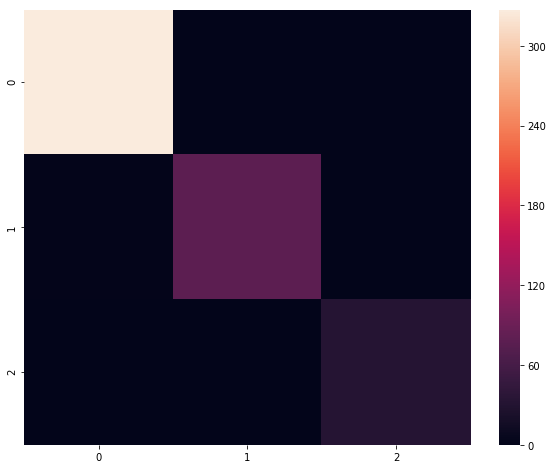

In [23]:
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, fmt='d')
plt.show()